# Практическое задание №2 по ОММ

## Вариант 27

### Выполнила студент 322 группы Салыкина Дария

## Постановка задачи

Используя метод переменных направлений, решите задачу:
$$
\begin{cases}
\frac{\partial u}{\partial t} = \Delta u + \sin2\pi x e^{-t}, 0<x<1, 0<y<1, t>0\\
u|_{x=0} = u|_{x=1} = 0,\\
\frac{\partial u}{\partial y}\bigg|_{y=0} = \frac{\partial u}{\partial y}\bigg|_{y=1} = 0,\\
u = \sin 2\pi x
\end{cases}$$

## Аналитическое решение

Ищем решение задачи в виде:
$$u(x,y,t) = T(t)V(x,y) $$
Тогда, решая исходную задачу методом разделения переменных, можем свести ее к двум задачам.

Первая: задача Коши
$$     \begin{cases}
        T^\prime(t) + \lambda T(t) = f_{nm}(t)\\
        T(0) = \sin 2\pi x
       \end{cases} $$

Вторая: задача Штурма-Лиувилля
$$     \begin{cases}
\Delta V + \lambda V = 0,\\
V|_{x=0} = V|_{x=1} = 0,\\
\frac{\partial V}{\partial y}\bigg|_{y=0} = \frac{\partial V}{\partial y}\bigg|_{y=1} = 0
\end{cases} $$
Ее тоже можно разбить на две новые задачи по переменным y и x:
$$ V(x,y)=X(x)Y(y) $$

$$     \begin{cases}
X^{\prime\prime}(x) + \alpha X(x) = 0\\
X(0) = 0\\
X(1) = 0
\end{cases} $$

Собственные значения $$\alpha = (\pi n)^2 $$
Собственные функции $$ X_n(x) = \sin(\pi nx) $$
$$\parallel  X_n \parallel ^2 = \frac{1}{2}$$

$$     \begin{cases}
Y^{\prime\prime}(y) + \beta Y(y) = 0\\
Y^\prime(0) = 0\\
Y^\prime(1) = 0
\end{cases} $$

Собственные значения $$\beta = (\pi n)^2 $$
Собственные функции $$ Y_n(x) = \cos(\pi my) $$
$$\parallel  Y_m \parallel ^2 = \frac{1}{2}(1+\delta_{n0})$$

Соберем $V$:
$$V_{nm} = \sin(\pi nx)\cos(\pi my) $$
$$\lambda = (\pi n)^2 + (\pi m)^2 $$
$$\parallel  V_{nm} \parallel ^2 = \frac{1}{4}(1+\delta_{n0}) $$
Из граничных условий видно, что $m=0, n=2$. Для остальных будем получать нулевое решение. Значит:
$$V_{20} = \sin(2\pi x) $$
$$\lambda = 4\pi^2  $$

Приведем явный вид функции $f_{nm}$:
$$ f_{nm} = \frac{1}{\parallel  V_{nm} \parallel ^2} \iint F(x,y,t)V_{nm}(x,y)dxdy = e^{-t} $$

В нашей задаче $\varphi = \sin 2\pi x$. Найдем значение для $\phi$:
$$\phi = \frac{1}{\parallel  V_{nm} \parallel ^2} \iint \varphi (x,y)V_{nm}(x,y)dxdy = 1 $$

Решим задачу Коши с помощью импульсной функции:

$$ K_{nm}(t-\tau) = e^{-\lambda_{nm}(t-\tau)} \rightarrow K_{20}(t-\tau)= e^{-4\pi^2(t-\tau)}$$

$$T_{nm} = \int_0^t K_{nm}(t-\tau) f_{nm}(t)d\tau + \phi e^{-\lambda_{nm}(t)} $$

$$T_{20} = \int_0^t e^{-4\pi^2(t-\tau)}e^{-\tau}d\tau + e^{-4\pi^2t} = \frac{e^{-t} + e^{-4\pi^2 t}(4\pi^2 -2)}{4\pi^2 - 1} $$

Тогда полное решение имеет вид:

$$ U = \frac{e^{-t} + e^{-4\pi^2 t}(4\pi^2 -2)}{4\pi^2 - 1}\sin2\pi x$$

## Построение аналитического решения

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
from mpl_toolkits.mplot3d import Axes3D
import tqdm as tqdm

In [2]:
N, M, T = 100, 100, 100
x_start, x_end = 0, 1
y_start, y_end = 0, 1
t_start, t_end = 0, 0.3
tau= t_end/ (T-1)
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,M) 
t = np.linspace(t_start,t_end,T)

In [3]:
u_a = np.zeros((N,M,T)) #2T+1
for n in tqdm.tqdm_notebook (range(0,N)):              
    for m in range(0,M):
        for j in range(0,T):
            u_a[n,m,j]=(exp(-t[j])+(4*np.pi**2 - 2)*exp(-4*t[j]*np.pi**2))*sin(2*np.pi*x[n])/(4*np.pi**2 - 1)     

C:\Users\ty\Documents\ВУЗ\6 семестр\ОММ\Прога\WPy64-3770\python-3.7.7.amd64\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Text(0.5, 0.92, 'График аналитического решения в момент времени t =0.15')

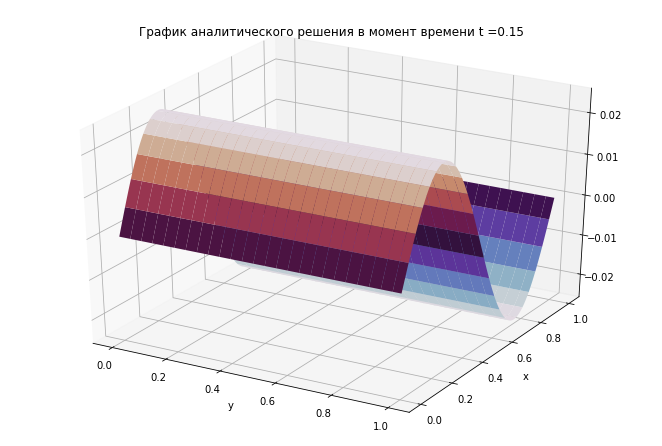

In [4]:
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u_a[:,:,int(T/2)], rstride=4, cstride=4, cmap = 'twilight' )
plt.xlabel('y')
plt.ylabel('x')
plt.title('График аналитического решения в момент времени t =' +str(round(tau*T/2,2)) + '')

Text(0.5, 0.92, 'Аналитическое решение в зависимости от x и t')

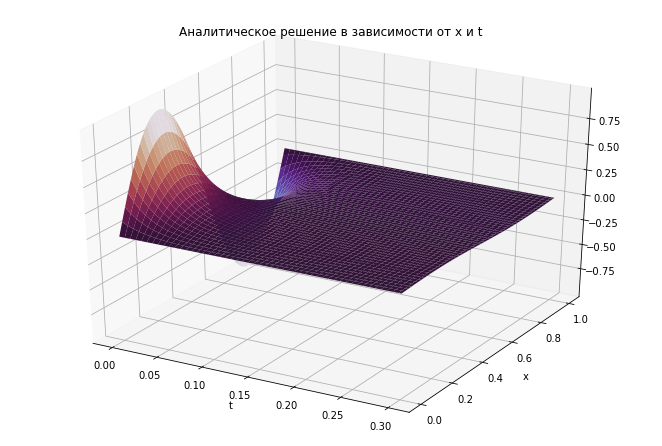

In [12]:
#3D график
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
t1, x1 = np.meshgrid(t,x)
ax.plot_surface(t1,x1,u_a[:,30,:],cmap='twilight')
plt.ylabel('x')
plt.xlabel('t')
plt.title('Аналитическое решение в зависимости от x и t')

## Численное решение

Введем равномерную трёхмерную сетку:
$$x_{i_1} =i_1h_x, i_1=\overline{0,N_x-1}, N_xh_x = 1\\
y_{i_2} = - \frac{h_y}{2} + i_2h_y, i_2=\overline{0,N_y-1}, N_yh_y = 1\\
t_j = j\tau, j=\overline{0,M-1}, M\tau = T$$

Будем искать решение методом переменных направлений, используя промежуточный слой в момент времени $t_{j+0.5}=\tau(j+0.5) $

Переход будем осуществлять следующим образом: $j \rightarrow j+0.5, j+0.5 \rightarrow j+1 $

 Конечно-разностные аналоги дифференциальных операторов $\frac{\partial^2}{\partial x^2}$ и $\frac{\partial^2}{\partial y^2}$:
 $$\Lambda_1u = \frac{u_{i_1-1,i_2} - 2u_{i_1,i_2} + u_{i_1 +1, i_2}} {h_x^2}\\
 \Lambda_2u = \frac{u_{i_1,i_2-1} - 2u_{i_1,i_2} + u_{i_1, i_2+1}} {h_y^2}$$

Решение разностной задачи обозначим за $\omega$. Мы сделали переход от дифференциальной задачи к разностной:
$$L\omega \rightarrow \Lambda_1\omega + \Lambda_2\omega $$

Получаем систему:
$$\begin{cases}
\frac{\omega^{j+0.5}_{i_1,i_2} - \omega^j_{i_1,i_2}}{0.5\tau} = \Lambda_1\omega^{j+0.5}_{i_1,i_2} + \Lambda_2\omega^{j}_{i_1,i_2}+f^{j+0.5}\\
\frac{\omega^{j+1}_{i_1,i_2} - \omega^{j+0.5}_{i_1,i_2}}{0.5\tau} = \Lambda_1\omega^{j+0.5}_{i_1,i_2} + \Lambda_2\omega^{j+1}_{i-1,i_2}+f^{j+0.5}
\end{cases}$$

Первое уравнение является неявным по направлению x и явным по y, второе - явное по x и неявное по y. Схема переменных направлений является экономической разностной схемой. Она является безусловно устойчивой, как неявная, и требует число операций, пропорциональное числу узлов сетки $O(N_x, N_y, M)$. Схема имеет точность аппроксимации $O(h_x^2 + h_y^2 + \tau^2)$

Разностная задача имеет вид (после подстановки явного вида операоров и некоторых преобразований):
$$\begin{cases}
0.5\gamma_1\omega^{j+0.5}_{i_1-1, i_2} - (1+\gamma_1)\omega^{j+0.5}_{i_1,i_2} + 0.5\gamma_1\omega^{j+0.5}_{i_1+1,i_2} = -F^{j+0.5}_{i_1,i_2}\\
F^{j+0.5}_{i_1,i_2} = 0.5\gamma_2(\omega^{j}_{i_1,i_2-1}+\omega^{j}_{i_1,i2+1})+(1-\gamma_2)\omega^{j}_{i_1,i_2} + 0.5\tau f^{j+0.5}\\
0.5\gamma_2\omega^{j+1}_{i_1, i_2-1} - (1+\gamma_2)\omega^{j+1}_{i_1,i_2} + 0.5\gamma_2\omega^{j+1}_{i_1,i_2+1} = -F^{j+0.5}_{i_1,i_2}\\
F^{j+1}_{i_1,i_2} = 0.5\gamma_1(\omega^{j+0.5}_{i_1-1,i_2}+\omega^{j+0.5}_{i_1+1,i2})+(1-\gamma_1)\omega^{j+0.5}_{i_1,i_2} + 0.5\tau f^{j+0.5}
\end{cases}$$

Здесь $\gamma_1=\frac{\tau}{h_x}, \gamma_2=\frac{\tau}{h_y}$

Введем следующие коэффициенты:
$$A_x = C_x = 0.5\gamma_1\\
B_x = 1 - \gamma_1\\
A_y=C_y=o.5\gamma_2\\
B_y=1-\gamma_2$$

Тогда мы получим систему уравнений, которую можно решить методом прогонки

## Построение численного решения

In [5]:
h_x = x_end/(N-1)
h_y = y_end/(M-2)
tau = t_end/(T)

gamma_1 = tau/(h_x**2)
gamma_2 = tau/(h_y**2)

x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start - h_y/2, y_end +h_y/2, M)
t = np.linspace(t_start, t_end, T)
u = np.zeros((N,M,2*T+1))

for n in range(0,N):
    for m in range(0,M):
        u[n,m,0]= sin(2*pi*x[n])

In [6]:
def progonka_X(m,j):
    alpha=np.zeros(N)
    beta = np.zeros(N)
    alpha[1]=0
    beta[1]=0
    A_x = 0.5*gamma_1
    B_x = 1 + gamma_1
    C_x = 0.5*gamma_1
    
    u[0,m,j]=0
    for n in range (1,N-1):
        F_x = 0.5*gamma_2*(u[n,m-1,j-1]+u[n,m+1,j-1])+(1-gamma_2)*u[n,m,j-1]+ 0.5 * tau * exp(-tau * (j+1)/2) * np.sin(2*np.pi*x[n])
        alpha[n+1] = C_x/(B_x - A_x*alpha[n])
        beta[n+1] = (F_x + A_x*beta[n])/(B_x-A_x*alpha[n])
        
    u[N-1,m,j] = 0
    for n in range(N-1,0,-1):
        u[n-1,m,j] = alpha[n]*u[n,m,j] + beta[n]

In [7]:
def progonka_Y(n,j):
    alpha=np.zeros(M)
    beta = np.zeros(M)
    alpha[1]=1
    beta[1]=0
    A_y = 0.5*gamma_2
    B_y = 1 + gamma_2
    C_y = 0.5*gamma_2
    for m in range(1,M-1):
        F_y = 0.5*gamma_1*(u[n-1,m,j-1]+u[n+1,m,j-1])+(1-gamma_1)*u[n,m,j-1]+ 0.5 * tau * np.exp(-tau * (j-1)/2) * np.sin(2*np.pi*x[n])
        alpha[m+1] = C_y/(B_y - A_y*alpha[m])
        beta[m+1] = (F_y + A_y*beta[m])/(B_y - A_y*alpha[m])
        
        u[n, M-1, j]=beta[-1]/(1-alpha[-1])
        for m in range(M-1,0,-1):
            u[n,m-1,j]=alpha[m]*u[n,m,j]+beta[m]

In [8]:
for j in tqdm.tqdm_notebook(range(1,2*T+1,2)):
    for m in range(1,M-1):
        progonka_X(m,j)
    for n in range(1,N-1):
        progonka_Y(n,j+1)
    for m in range(0,M):
        u[0,m,j+1]=0
        u[N-1,m,j+1]=0

C:\Users\ty\Documents\ВУЗ\6 семестр\ОММ\Прога\WPy64-3770\python-3.7.7.amd64\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


Text(0.5, 0.92, 'Численное решение')

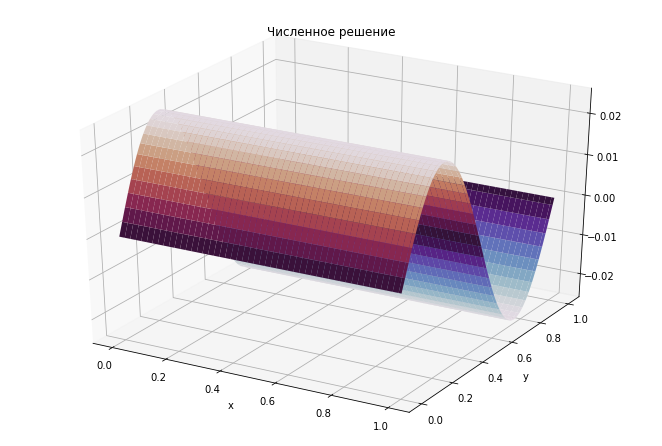

In [9]:
#3D график
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1, y1 = np.meshgrid(x,y)
ax.plot_surface(x1,y1,u[:,:,int(T)],cmap='twilight')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Численное решение')

Text(0.5, 0.92, 'Численное решение в зависимости от x и t')

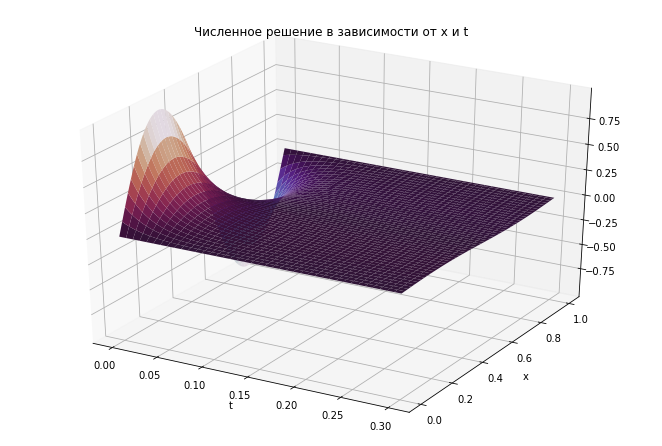

In [13]:
#3D график
tt = np.linspace(0,t_end,2*T+1)
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
tt1, x1 = np.meshgrid(tt,x)
ax.plot_surface(tt1,x1,u[:,30,:],cmap='twilight')
plt.ylabel('x')
plt.xlabel('t')
plt.title('Численное решение в зависимости от x и t')

# Погрешность

Text(0.5, 0.92, 'График погрешности при t =0.15')

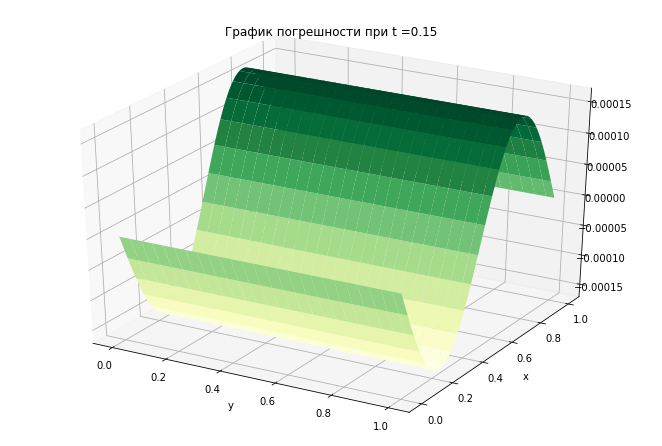

In [10]:
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u_a[:,:,int(T/2)]-u[:,:,int(T)], rstride=4, cstride=4, cmap = 'YlGn')
plt.xlabel('y')
plt.ylabel('x')
plt.title('График погрешности при t =' +str(round(tau*T/2,2)) + '')